In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



/var/folders/3m/l0tyzx5j5lg1wtczpcc3ff8h0000gn/T/ipykernel_3107/1676706666.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('../clinical-notes-subsample/customer facing csv files/b_sample_patencprocedures_notes.csv',  delimiter="|")

In [3]:
data.shape

(12, 14)

In [4]:
data.head()

,encounter_id,patient_id,diagnosis_date,type,procedure_id,procedure_name,kb_procedure_name,eye,code,anesthesia,prep,number,linked_diagnosis,"deidentified,,,,,"
0,1,6.0,1900-01-01 00:00:00+00:00,Clinical,0.0,SLT,SLT,OD,65855,Topical,Alphagan 0.15%,NaN,"POAG, Mild","PROCEDURE NOTE: SLT OD. Diagnosis: POAG, Mild...."
1,3,6.0,1900-01-01 00:00:00+00:00,Clinical,0.0,SLT,SLT,OS,65855,Topical,Alphagan 0.15%,NaN,"POAG, Mild","PROCEDURE NOTE: SLT OS. Diagnosis: POAG, Mild...."
2,4,0.0,1900-01-01 00:00:00+00:00,Clinical,1.0,Avastin (J9035),Avastin (J9035),OD,"67028,J9035",Topical/Subconjunctival,Betadine Drops and Betadine Scrub,NaN,Neovascular AMD with Active CN,PROCEDURE NOTE: Avastin (<ID>) OD. Diagnosis: ...
3,9,0.0,1900-01-01 00:00:00+00:00,Clinical,1.0,Avastin (J9035),Avastin (J9035),OD,"67028,J9035",Topical/Subconjunctival,Betadine Drops and Betadine Scrub,NaN,Neovascular AMD with Active CN,PROCEDURE NOTE: Avastin (<ID>) OD. Diagnosis: ...
4,10,0.0,1900-01-01 00:00:00+00:00,Clinical,1.0,Avastin (J9035),Avastin (J9035),OD,"67028,J9035",Topical/Subconjunctival,Betadine Drops and Betadine Scrub,NaN,Neovascular AMD with Active CN,PROCEDURE NOTE: Avastin (<ID>) OD. Diagnosis: ...


In [5]:
data.tail()

,encounter_id,patient_id,diagnosis_date,type,procedure_id,procedure_name,kb_procedure_name,eye,code,anesthesia,prep,number,linked_diagnosis,"deidentified,,,,,"
7,0,0.0,1900-01-01 00:00:00+00:00,Clinical,1.0,Avastin (J9035),Avastin (J9035),OD,"67028,J9035",Topical/Subconjunctival,Betadine Drops and Betadine Scrub,NaN,Neovascular AMD with Active CN,PROCEDURE NOTE: Avastin (<ID>) OD. Diagnosis: ...
8,8,0.0,1900-01-01 00:00:00+00:00,Clinical,1.0,Avastin (J9035),Avastin (J9035),OD,"67028,J9035",Topical/Subconjunctival,Betadine Drops and Betadine Scrub,NaN,Neovascular AMD with Active CN,PROCEDURE NOTE: Avastin (<ID>) OD. Diagnosis: ...
9,11,0.0,1900-01-01 00:00:00+00:00,Clinical,1.0,Avastin (J9035),Avastin (J9035),OD,"67028,J9035",Topical/Subconjunctival,Betadine Drops and Betadine Scrub,NaN,Neovascular AMD with Active CN,PROCEDURE NOTE: Avastin (<ID>) OD. Diagnosis: ...
10,5,0.0,1900-01-01 00:00:00+00:00,Clinical,1.0,Avastin (J9035),Avastin (J9035),OD,"67028,J9035",Topical/Subconjunctival,Betadine Drops and Betadine Scrub,NaN,Neovascular AMD with Active CN,PROCEDURE NOTE: Avastin (<ID>) OD. Diagnosis: ...
11,7|4|1900-01-01 00:00:00+00:00|Surgical|2|YAG C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   encounter_id       12 non-null     object 
 1   patient_id         11 non-null     float64
 2   diagnosis_date     11 non-null     object 
 3   type               11 non-null     object 
 4   procedure_id       11 non-null     float64
 5   procedure_name     11 non-null     object 
 6   kb_procedure_name  11 non-null     object 
 7   eye                11 non-null     object 
 8   code               11 non-null     object 
 9   anesthesia         11 non-null     object 
 10  prep               11 non-null     object 
 11  number             0 non-null      float64
 12  linked_diagnosis   11 non-null     object 
 13  deidentified,,,,,  11 non-null     object 
dtypes: float64(3), object(11)
memory usage: 1.4+ KB


## Checking for Duplication

In [8]:
data.nunique()

encounter_id         12
patient_id            2
diagnosis_date        1
type                  1
procedure_id          2
procedure_name        2
kb_procedure_name     2
eye                   2
code                  2
anesthesia            2
prep                  2
number                0
linked_diagnosis      2
deidentified,,,,,     3
dtype: int64

In [9]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [encounter_id, patient_id, diagnosis_date, type, procedure_id, procedure_name, kb_procedure_name, eye, code, anesthesia, prep, number, linked_diagnosis, deidentified,,,,,]
Index: []


## Checking Missing Values

In [10]:
data.isnull().sum()

encounter_id          0
patient_id            1
diagnosis_date        1
type                  1
procedure_id          1
procedure_name        1
kb_procedure_name     1
eye                   1
code                  1
anesthesia            1
prep                  1
number               12
linked_diagnosis      1
deidentified,,,,,     1
dtype: int64

In [12]:
(data.isnull().sum()/(len(data)))*100

encounter_id           0.000000
patient_id             8.333333
diagnosis_date         8.333333
type                   8.333333
procedure_id           8.333333
procedure_name         8.333333
kb_procedure_name      8.333333
eye                    8.333333
code                   8.333333
anesthesia             8.333333
prep                   8.333333
number               100.000000
linked_diagnosis       8.333333
deidentified,,,,,      8.333333
dtype: float64

<Axes: >

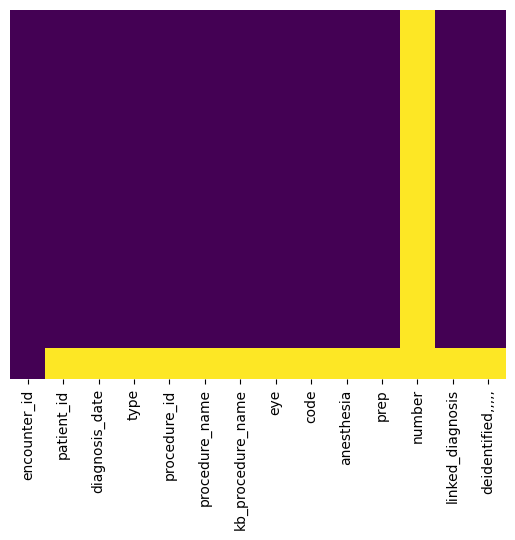

In [13]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Checking for inconsistent data types

In [15]:
data_types = data.dtypes
print(data_types)

encounter_id          object
patient_id           float64
diagnosis_date        object
type                  object
procedure_id         float64
procedure_name        object
kb_procedure_name     object
eye                   object
code                  object
anesthesia            object
prep                  object
number               float64
linked_diagnosis      object
deidentified,,,,,     object
dtype: object
